In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(X_train, y_train),(X_test, y_test)= datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_test.shape

(10000, 32, 32, 3)

# Data exploration

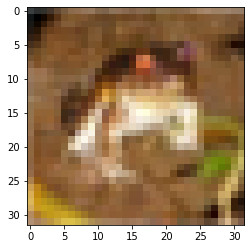

In [30]:
plt.imshow(X_train[0])

In [31]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [32]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

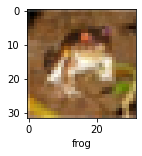

In [35]:
plot_sample(X_train, y_train, 0)

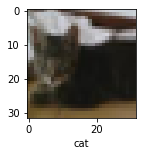

In [36]:
plot_sample(X_train, y_train, 9)

# Normalization

In [37]:
X_train=X_train/255
X_test=X_test/255


# ANN to check the performance( to apply CNN later):

In [38]:
ann= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 158s 100ms/step - loss: 1.8958 - accuracy: 0.3301
Epoch 2/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.6636 - accuracy: 0.4029
Epoch 3/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.5774 - accuracy: 0.4372
Epoch 4/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.5209 - accuracy: 0.4551
Epoch 5/5
1563/1563 [==============================] - 176s 113ms/step - loss: 1.4844 - accuracy: 0.4688


In [39]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 1.4823 - accuracy: 0.4711


[1.4822776317596436, 0.47110000252723694]

# Here, the performance is poor i.e, the accuracy. so lets try CNN to improve performance

In [40]:
cnn=models.Sequential([
        #cnn:
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])


In [41]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [42]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4986 - accuracy: 0.4629
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1518 - accuracy: 0.5959
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0156 - accuracy: 0.6455
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9248 - accuracy: 0.6774
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8589 - accuracy: 0.7012


In [43]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9760 - accuracy: 0.6681


[0.9759575128555298, 0.6680999994277954]

In [ ]:
# in the cnn, ther accuracy is increased

In [44]:
y_pred= cnn.predict(X_test)
y_pred[:5]

array([[7.8297555e-02, 1.1178467e-01, 3.3692056e-01, 9.5133495e-01,
        1.4754891e-01, 6.6338933e-01, 6.3396436e-01, 6.3070655e-03,
        6.6675353e-01, 3.3408245e-01],
       [8.9811182e-01, 9.9693209e-01, 3.0930251e-02, 1.4985949e-02,
        1.7199934e-02, 9.0861320e-04, 2.6721954e-03, 4.9208701e-03,
        9.9915344e-01, 8.7751937e-01],
       [3.4131145e-01, 9.6790624e-01, 5.9962958e-02, 2.7693841e-01,
        6.6517383e-02, 7.3358089e-02, 6.4976215e-02, 1.4129063e-01,
        9.4152951e-01, 8.1195951e-01],
       [9.5209801e-01, 8.1568772e-01, 2.1558315e-01, 7.4005336e-02,
        6.8541026e-01, 7.7759027e-03, 2.9128850e-02, 1.3168871e-02,
        8.5853279e-01, 9.1467410e-02],
       [2.3557544e-03, 4.7655135e-02, 8.3682799e-01, 9.1839564e-01,
        9.7966933e-01, 8.4342563e-01, 9.7314334e-01, 2.0956337e-02,
        4.5542389e-02, 5.5467188e-03]], dtype=float32)

In [47]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [48]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

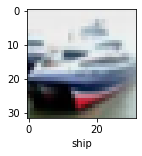

In [50]:
plot_sample(X_test, y_test,1)

In [52]:
classes[y_classes[1]]

'ship'